#**NIAIS ASSIGNMENT**
##Submitted By Wahid Dino Samo




##**Step 1: Data Collection**
We need to collect data about student grades and their GPAs. This data can be obtained from
the university's student record system or by asking students to provide their grades and GPAs.
We will use this data to train our Linear Regression model.

Solution:
 Dataset for the assignment is taken from kaggle reference: https://www.kaggle.com/datasets/sankha1998/student-semester-result

Downloaded and stored the dataset to my github repository
https://github.com/wahiddinosamo08/NIAiSAssignment

###Step 1.1: Downloading the Data

In [138]:
dataset_url = 'https://raw.githubusercontent.com/wahiddinosamo08/NIAiSAssignment/main/data.csv'

In [139]:
from urllib.request import urlretrieve

In [140]:
urlretrieve(dataset_url,'data.csv')

('data.csv', <http.client.HTTPMessage at 0x79aa8ee99360>)

###Step 1.2: Checking the Downloaded Data using pandas

In [141]:
import pandas as pd

In [142]:
cgpa_df =pd.read_csv('data.csv')

In [143]:
cgpa_df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,17020,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,17021,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,17022,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,17023,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,17024,16
...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17048,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051,28


By Analyzing the Data we know that the dataset contains 177 rows and 9 columns. Each Row contains GPA of each student for consecutive 5 semesters. there is some data cleaning required that will be done sooner.

Our Objective is to predict the GPAs of Students by using linear regression model. for reference we will use semesters 1 to 4 data to predict values in 5th semester.

## **Step 2: Data Preprocessing**
Once we have collected the data, we need to preprocess it before training our model. This involves cleaning the data, removing any missing values, and converting categorical variables into numerical values.

In [144]:
cgpa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          178 non-null    int64  
 8   Subject Code  178 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 12.6+ KB


In [145]:
cgpa_df.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll,Subject Code
count,176.000000,174.000000,176.00000,173.000000,172.000000,178.000000,178.000000,178.000000
mean,7.038864,6.943391,6.62250,7.027746,7.432558,152.983146,17041.140449,18.359551
std,0.859521,0.881088,0.91926,1.035675,1.068866,48.357599,13.557471,4.782849
min,3.850000,3.900000,3.96000,4.290000,4.000000,115.000000,17017.000000,16.000000
25%,6.440000,6.380000,6.14000,6.330000,6.750000,115.000000,17030.000000,16.000000
50%,7.070000,6.800000,6.68500,7.070000,7.590000,116.000000,17041.000000,16.000000
75%,7.590000,7.612500,7.26000,7.860000,8.210000,165.000000,17052.000000,16.000000
max,9.150000,9.210000,9.59000,9.310000,9.460000,241.000000,17067.000000,28.000000


In [146]:
cgpa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1st,176.0,7.038864,0.859521,3.85,6.44,7.070,7.5900,9.15
2nd,174.0,6.943391,0.881088,3.90,6.38,6.800,7.6125,9.21
3rd,176.0,6.622500,0.919260,3.96,6.14,6.685,7.2600,9.59
4th,173.0,7.027746,1.035675,4.29,6.33,7.070,7.8600,9.31
5th,172.0,7.432558,1.068866,4.00,6.75,7.590,8.2100,9.46
College Code,178.0,152.983146,48.357599,115.00,115.00,116.000,165.0000,241.00
Roll,178.0,17041.140449,13.557471,17017.00,17030.00,17041.000,17052.0000,17067.00
Subject Code,178.0,18.359551,4.782849,16.00,16.00,16.000,16.0000,28.00


In [147]:
cgpa_df.Gender

0      Female
1        Male
2      Female
3        Male
4        Male
        ...  
173         F
174         M
175         M
176         M
177         M
Name: Gender, Length: 178, dtype: object

We can see that here  are some values that are Female and Some are Male and others are F and M. So in it we have to make similar values like F for female and M for Male.



In [148]:
cgpa_df['Gender'].replace({'Female':'F','Male':'M'},inplace=True)

In [149]:
cgpa_df.Gender

0      F
1      M
2      F
3      M
4      M
      ..
173    F
174    M
175    M
176    M
177    M
Name: Gender, Length: 178, dtype: object

In [150]:
cgpa_df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,F,17020,16
1,6.48,5.90,4.15,4.29,4.96,115,M,17021,16
2,8.41,8.24,7.52,8.25,7.75,115,F,17022,16
3,7.33,6.83,6.33,6.79,6.89,115,M,17023,16
4,7.89,7.34,7.22,7.32,7.46,115,M,17024,16
...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17048,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051,28


### Removing Missing Values from the Dataset

In [151]:
cgpa_df.isnull().sum()

1st             2
2nd             4
3rd             2
4th             5
5th             6
College Code    0
Gender          1
Roll            0
Subject Code    0
dtype: int64

In [152]:
cgpa_df['Gender'].fillna(0,inplace=True)                 # Replacing Null values from 0

cgpa_df['1st'].fillna(cgpa_df['1st'].mean(),inplace = True)        # Replacing Null values from 0
cgpa_df['2nd'].fillna(cgpa_df['2nd'].mean(),inplace=True)        # Replacing Null values from 0
cgpa_df['3rd'].fillna(cgpa_df['3rd'].mean(),inplace=True)        # Replacing Null values from 0
cgpa_df['4th'].fillna(cgpa_df['4th'].mean(),inplace=True)        # Replacing Null values from 0
cgpa_df['5th'].fillna(cgpa_df['5th'].mean(),inplace=True)        # Replacing Null values from 0

In [153]:
cgpa_df.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Roll            0
Subject Code    0
dtype: int64

### Lets Combine the College Code, Subject Code, and Roll No Code into a Single Column.

In [154]:
cgpa_df['College Code']=cgpa_df['College Code'].astype(str)
cgpa_df['Subject Code']=cgpa_df['Subject Code'].astype(str)
cgpa_df['Roll']=cgpa_df['Roll'].astype(str)
cgpa_df['studentid']=cgpa_df['College Code']+cgpa_df['Subject Code']+cgpa_df['Roll']
cgpa_df['studentid']

0      1151617020
1      1151617021
2      1151617022
3      1151617023
4      1151617024
          ...    
173    2412817048
174    2412817049
175    2412817050
176    2412817051
177    2412817052
Name: studentid, Length: 178, dtype: object

In [155]:
cgpa_df.drop(columns=['Subject Code','Roll'],inplace=True)

In [156]:
cgpa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           178 non-null    float64
 1   2nd           178 non-null    float64
 2   3rd           178 non-null    float64
 3   4th           178 non-null    float64
 4   5th           178 non-null    float64
 5   College Code  178 non-null    object 
 6   Gender        178 non-null    object 
 7   studentid     178 non-null    object 
dtypes: float64(5), object(3)
memory usage: 11.2+ KB


Now there are No Null Values in the Dataset. We can proceed further.

### Introduce Average Column
In this step we will introduce a column Average which will be the average gpa of the student. We do this to releate 1st,2nd,3rd,4th,5th Semester CGPAs. Otherwise we wont be able to make a correleation

In [157]:
cgpa_df['Avg']=(cgpa_df['1st']+cgpa_df['2nd']+cgpa_df['3rd']+cgpa_df['4th']+cgpa_df['5th'])/5

In [158]:
cgpa_df

,1st,2nd,3rd,4th,5th,College Code,Gender,studentid,Avg
0,8.11,7.68,7.11,7.43,8.18,115,F,1151617020,7.702
1,6.48,5.90,4.15,4.29,4.96,115,M,1151617021,5.156
2,8.41,8.24,7.52,8.25,7.75,115,F,1151617022,8.034
3,7.33,6.83,6.33,6.79,6.89,115,M,1151617023,6.834
4,7.89,7.34,7.22,7.32,7.46,115,M,1151617024,7.446
...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,2412817048,7.748
174,7.30,6.41,6.59,7.11,7.38,241,M,2412817049,6.958
175,6.30,6.28,5.89,5.71,6.50,241,M,2412817050,6.136
176,7.04,7.10,6.81,7.00,6.92,241,M,2412817051,6.974


### Exploratory Analysis and Visualization
In order to determine the independent and dependent varriables to establish the releationships between 'Averages' and other columns.

i will use matplotlib, seaborn and plotly for visulization

In [159]:
!pip install plotly matplotlib seaborn --quiet

In [160]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### 1st Semester GPA

In [162]:
cgpa_df['1st'].describe()

count    178.000000
mean       7.038864
std        0.854651
min        3.850000
25%        6.450000
50%        7.055000
75%        7.590000
max        9.150000
Name: 1st, dtype: float64

In [163]:
fig = px.histogram(cgpa_df,
                   x='1st',
                   marginal='box',
                   nbins=47,
                   title='Distribution of 1st Semester CGPA')
fig.update_layout(bargap=0.1)
fig.show()

We can say that majority of the students have an GPA of 7 in the first semester and only a few students at the tails. the Graph indicates that we have a noraml distrubution in 1st semester GPA.


#### 2nd Semester GPA

In [164]:
cgpa_df['2nd'].describe()

count    178.000000
mean       6.943391
std        0.871075
min        3.900000
25%        6.380000
50%        6.845000
75%        7.590000
max        9.210000
Name: 2nd, dtype: float64

In [165]:
fig = px.histogram(cgpa_df,
                   x='2nd',
                   marginal='box',
                   nbins=47,
                   title='Distribution of 2nd Semester CGPA')
fig.update_layout(bargap=0.1)
fig.show()

We can see that the students have improved their GPAs, got more than 6 gpa on average in the 2nd Semesters and only 2 students have cgpa less than 5.

#### 3rd Semester GPA

In [166]:
cgpa_df['3rd'].describe()

count    178.000000
mean       6.622500
std        0.914052
min        3.960000
25%        6.160000
50%        6.650000
75%        7.250000
max        9.590000
Name: 3rd, dtype: float64

In [167]:
fig = px.histogram(cgpa_df,
                   x='3rd',
                   marginal='box',
                   nbins=47,
                   title='Distribution of 3rd Semester CGPA')
fig.update_layout(bargap=0.1)
fig.show()

It is found that that students have reduced their gpa in 3rd semester. The Average remains above 6.

#### 4th Semester GPA

In [168]:
cgpa_df['4th'].describe()

count    178.000000
mean       7.027746
std        1.020942
min        4.290000
25%        6.360000
50%        7.040000
75%        7.820000
max        9.310000
Name: 4th, dtype: float64

In [169]:
fig = px.histogram(cgpa_df,
                   x='4th',
                   marginal='box',
                   nbins=47,
                   title='Distribution of 4th Semester CGPA')
fig.update_layout(bargap=0.1)
fig.show()

The 4th Semester Distribution follows a Guassian Distribution where average of the class has improved.

#### 5th Semester GPA

In [170]:
cgpa_df['5th'].describe()

count    178.000000
mean       7.432558
std        1.050594
min        4.000000
25%        6.760000
50%        7.520000
75%        8.210000
max        9.460000
Name: 5th, dtype: float64

In [171]:
fig = px.histogram(cgpa_df,
                   x='5th',
                   marginal='box',
                   nbins=47,
                   title='Distribution of 5th Semester CGPA')
fig.update_layout(bargap=0.1)
fig.show()

The 5th Semester seems good as students have improved their scores. more students have gained gpa more than 7.

#### Average

In [172]:
cgpa_df['Avg'].describe()

count    178.000000
mean       7.013012
std        0.841641
min        4.747549
25%        6.444929
50%        6.998000
75%        7.640500
max        9.344000
Name: Avg, dtype: float64

In [173]:
fig = px.histogram(cgpa_df,
                   x='Avg',
                   marginal='box',
                   color = 'Gender',
                   color_discrete_sequence =['red','blue','green'],
                   nbins=47,
                   title='Distribution of Average of the Students')
fig.update_layout(bargap=0.1)
fig.show()

We can see that the Gender does not have a significant effect on the averages so we will not consider the Gender into our data.

#### **Correleation**

In [174]:
Gender_values = {'F':0,'M':1}
Gender_numeric =cgpa_df.Gender.map(Gender_values)
cgpa_df.Avg.corr(Gender_numeric)

-0.1855632190356175

In [175]:
studentidnum = cgpa_df.studentid.map(int)
cgpa_df.Avg.corr(studentidnum)

-0.04046643390114833

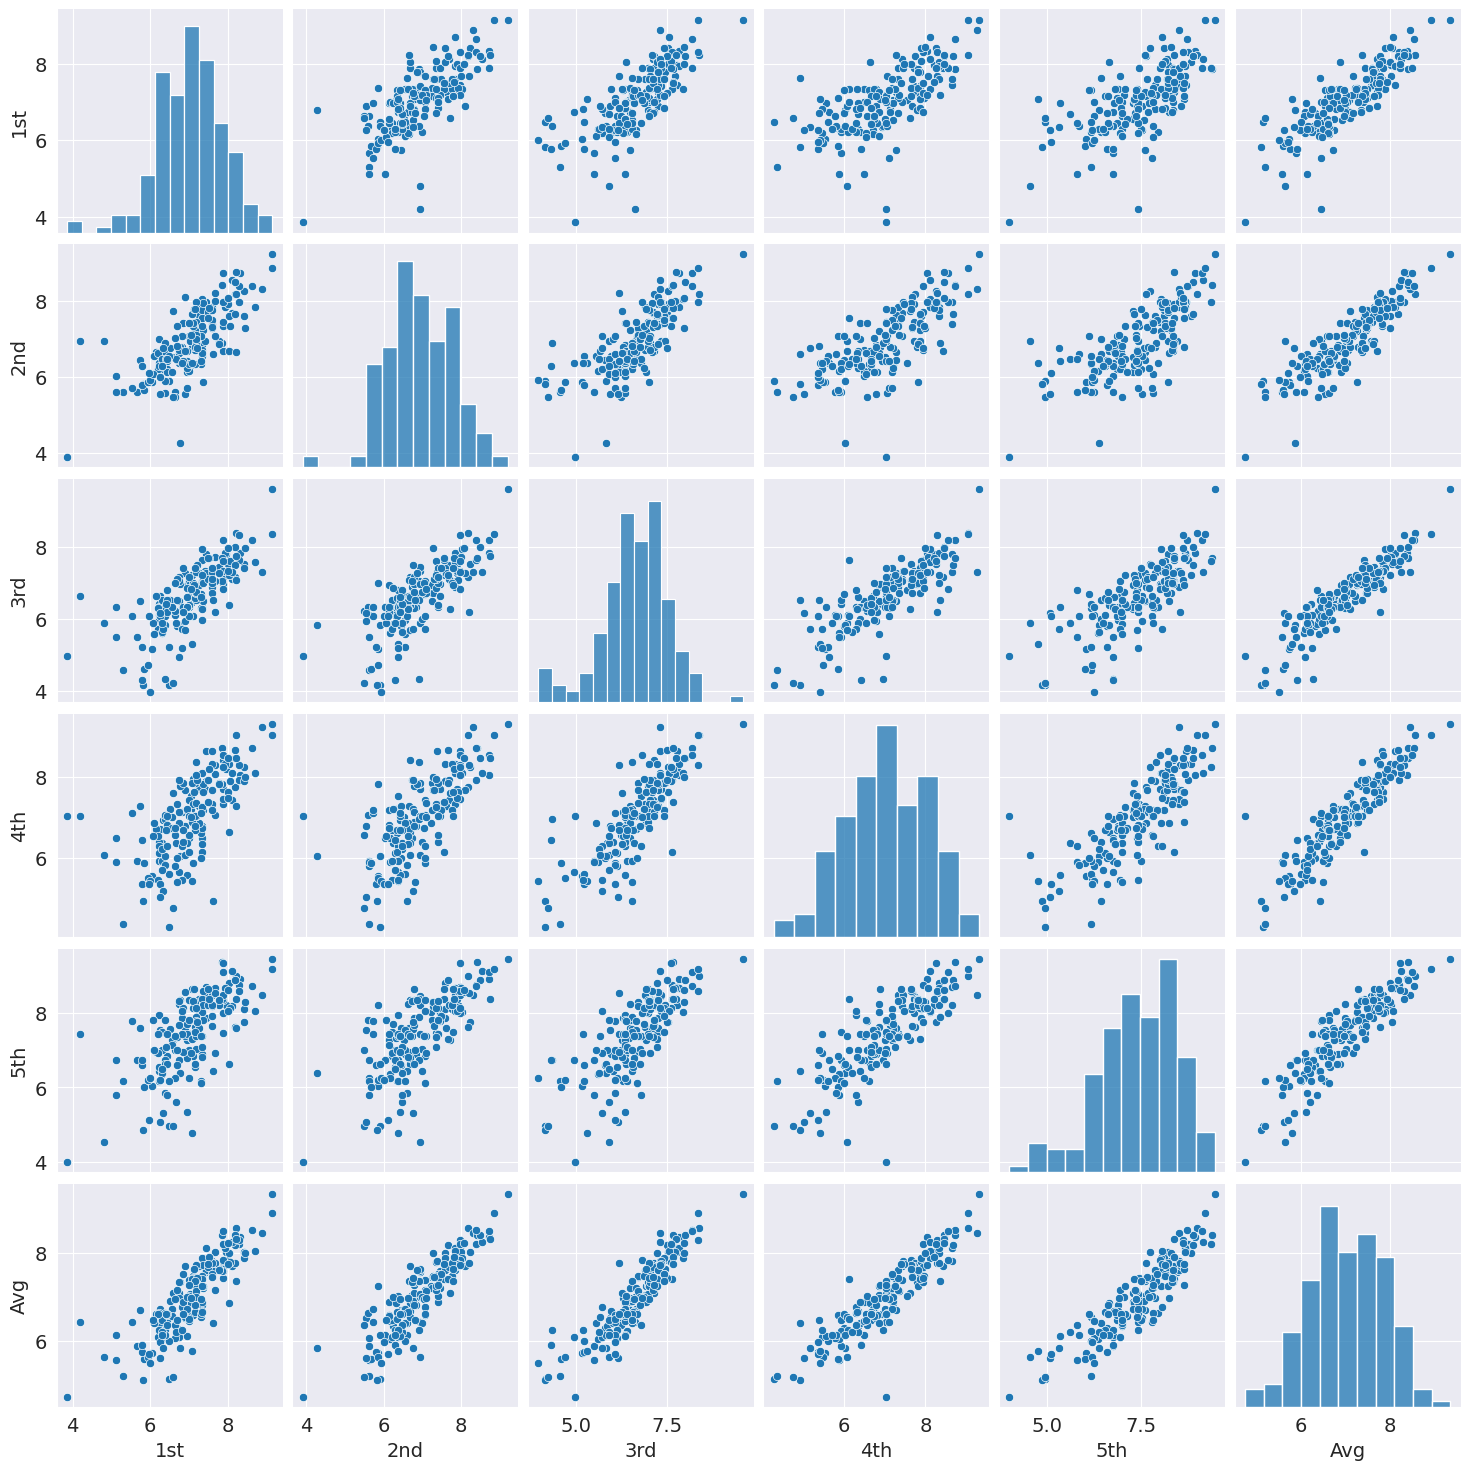

In [176]:
sns.pairplot(cgpa_df)

<ipython-input-186-7ec983e3d8e3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



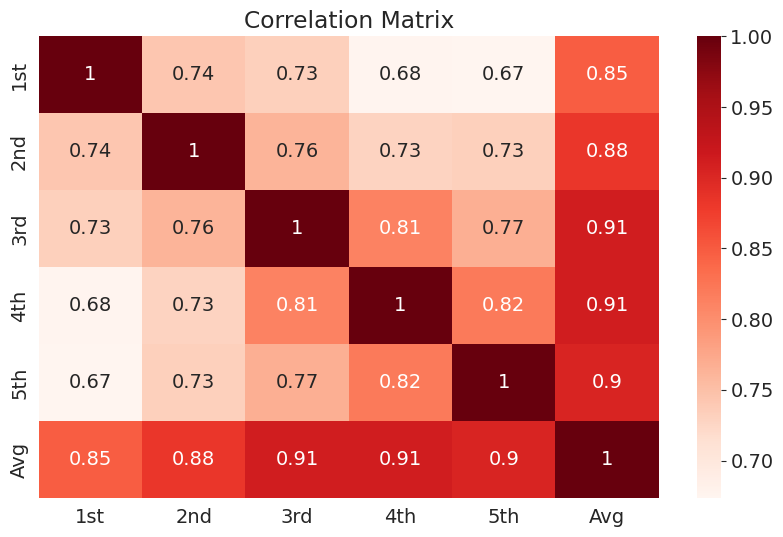

In [186]:
sns.heatmap(cgpa_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## **Step 3: Splitting Data**
We will split the data into training and testing sets. We will use the training set to train our Linear Regression model and the testing set to evaluate its performance.

#### Selecting the Colummns with Correlation only


In [177]:
rcgpa_df = cgpa_df[['1st','2nd', '3rd', '4th','5th']]

In [178]:
rcgpa_df

,1st,2nd,3rd,4th,5th
0,8.11,7.68,7.11,7.43,8.18
1,6.48,5.90,4.15,4.29,4.96
2,8.41,8.24,7.52,8.25,7.75
3,7.33,6.83,6.33,6.79,6.89
4,7.89,7.34,7.22,7.32,7.46
...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65
174,7.30,6.41,6.59,7.11,7.38
175,6.30,6.28,5.89,5.71,6.50
176,7.04,7.10,6.81,7.00,6.92


#### Split Data into train and test

In [179]:
from sklearn.model_selection import train_test_split

X = rcgpa_df[['1st','2nd','3rd','4th']]
y = cgpa_df['5th']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 1/3 , random_state=21)

## Step 4: Training the Model
We will use the Linear Regression algorithm from scikit-learn library to train our model. We
will fit the model to the training data and use it to predict GPAs for the testing data

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
gpa_model = LinearRegression()
gpa_model.fit(X_train,y_train.values)

LinearRegression()

## Step 5: Evaluating the Model
We will evaluate the performance of our model by comparing its predicted GPAs to the actual
GPAs of the testing data. We will use metrics such as mean squared error (MSE) and
coefficient of determination (R²) to evaluate the model's performance

### Prediction

In [182]:
y_pred = gpa_model.predict(X_test)
difference = y_test - y_pred
dif = round(difference, 2)
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': dif})
result_df.head()

,Actual,Predicted,Difference
13,7.00,7.148605,-0.15
113,8.21,7.635667,0.57
21,8.93,8.745476,0.18
143,8.38,8.904392,-0.52
173,8.65,8.048572,0.60


### Mean Square Error

In [183]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 0.26


### Co-efficient of determination

In [184]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.72


## Step 6: Making Predictions
Once we have trained and evaluated our model, we can use it to predict GPAs for new students. We will provide the model with the student's grades and it will predict their GPA.

In [185]:
new_student = [[4.2, 5.63, 6.55, 5.66]]
new_gpa = gpa_model.predict(new_student)
print('Predicted GPA: %.2f' % new_gpa)

Predicted GPA: 6.21


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

